In [2]:
import numpy as np
import pandas as pd

In [3]:
def read_datafile(filename):
    df = pd.read_csv(filename,delimiter='\s+')
    X = df.values
    return X

In [4]:
X = read_datafile('blobs.txt')

In [5]:
def kth_nearest_neighbour(datapoint,X,k):
    arr = []
    for each in X:
        arr.append(np.linalg.norm(datapoint-each))
        
    return sorted(arr)[k-1]

In [6]:
def generate_all_kth_nearest_neightbour(X,k):
    arr = []
    
    for each in X:
        arr.append(kth_nearest_neighbour(each,X,k))
    
    return sorted(arr)

In [7]:
arr = generate_all_kth_nearest_neightbour(X,4)

In [10]:
import matplotlib.pyplot as plt

def plot(arr):
    X = list(range(1,len(arr)+1))
    Y = arr

    plt.plot(X,Y)

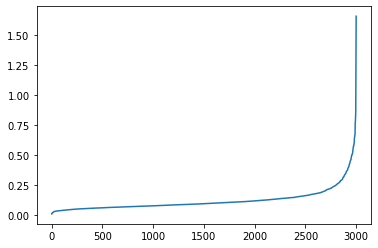

In [11]:
plot(arr)

In [12]:
EPS = 0.4
MINPTS = 4

In [22]:
def CountPoints(datapoint,X,EPS):
    count = 0

    for each in X:
        val = np.linalg.norm(datapoint-each)
        if val <= EPS:
            count += 1

    return count-1

In [23]:
noise_points = []
core_points = []
unassigned_points = []

In [24]:
for each in X:
    count = CountPoints(each,X,EPS)
    if count > MINPTS:
        core_points.append(each)
    elif count == 0:
        noise_points.append(each)
    else:
        unassigned_points.append(each)

In [46]:
# assign core points to distinct clusters

id = 1

cluster_map = {}
visited = {}
nodes = []

for each in core_points:
    nodes.append((each[0],each[1]))
    cluster_map[(each[0],each[1])] = id
    visited[(each[0],each[1])] = False
    id += 1

In [49]:
import math

def pair_distance(p0,p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

def dfs_util(node):
    if visited[node]:
        return
    else:
        visited[node] = True
        for each in visited.keys():
            if not visited[each]:
                val = pair_distance(node,each)
                if val <= EPS:
                    cluster_map[each] = cluster_map[node]
                    dfs_util(each)

for node in nodes:
    if not visited[node]:
        dfs_util(node)

In [57]:
# number of cluster
K = len(set(cluster_map.values()))

cluster_wise_data = {}

for each in cluster_map.items():
    if each[1] in cluster_wise_data:
        cluster_wise_data[each[1]].append(each[0])
    else:
        cluster_wise_data[each[1]] = [each[0]]

In [60]:
for each in unassigned_points:
    point = (each[0],each[1])
    flag = False
    for k in cluster_wise_data.keys():
        for each in cluster_wise_data[k]:
            if pair_distance(each,point) <= EPS:
                cluster_wise_data[k].append(point)
                flag = True
                break
        if flag == True:
            break

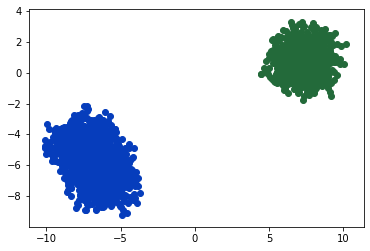

In [63]:
import random

for k in cluster_wise_data.keys():
    rgb = (random.random(), random.random(), random.random())
    for each in cluster_wise_data[k]:
        plt.scatter(each[0],each[1],c=[rgb])